In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

In [3]:
plt.rc('font',family='Arial') 

In [4]:
bin_data=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\Table S3.csv")

In [5]:
#load metadata from UHGG2.0
UHGG=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\genomes-all_metadata.tsv",sep="\t")

In [6]:
#add one new column as species
UHGG["sp"]=[i[0] for i in UHGG.Lineage.str.findall("s__.*")]

In [7]:
#only inculde the MAG data
UHGG_MAG_SP=UHGG[UHGG.Genome_type!="Isolate"][UHGG[UHGG.Genome_type!="Isolate"]["sp"]!="s__"]

In [8]:
#dereplicated the same species
UHGG_MAG_Sample_unique_sp_count=[len(i) for i in UHGG_MAG_SP.groupby("Sample_accession")["sp"].unique()]

In [9]:
#remove the outliers before plot

In [10]:
UHGG_MAGS_sample_size=pd.DataFrame(UHGG_MAG_Sample_unique_sp_count)

IQR=UHGG_MAGS_sample_size.quantile(0.75)-UHGG_MAGS_sample_size.quantile(0.25)
UP_thr=UHGG_MAGS_sample_size.quantile(0.75)+1.5*IQR
DOWN_thr=UHGG_MAGS_sample_size.quantile(0.25)-1.5*IQR

UHGG_MAGS_sample_size_Fil=UHGG_MAGS_sample_size[(UHGG_MAGS_sample_size>DOWN_thr) & (UHGG_MAGS_sample_size<UP_thr)]

In [11]:
# remove all unclassifed species
bin_data_known=bin_data[bin_data["Species"]!="s__"]

In [12]:
cMECOS_MAGS_sample_size=pd.DataFrame([len(i) for i in bin_data_known.groupby("People")["Species"].unique()])
IQR=cMECOS_MAGS_sample_size.quantile(0.75)-cMECOS_MAGS_sample_size.quantile(0.25)
UP_thr=cMECOS_MAGS_sample_size.quantile(0.75)+1.5*IQR
DOWN_thr=cMECOS_MAGS_sample_size.quantile(0.25)-1.5*IQR

cMECOS_MAGS_sample_size_Fil=cMECOS_MAGS_sample_size[(cMECOS_MAGS_sample_size>DOWN_thr) & (cMECOS_MAGS_sample_size<UP_thr)]

In [13]:
UHGG_MAGS_sample_size_plot=pd.DataFrame(UHGG_MAGS_sample_size_Fil)
UHGG_MAGS_sample_size_plot.columns=["size"]
UHGG_MAGS_sample_size_plot["type"]="UHGG"

cMECOS_MAGS_sample_size_plot=pd.DataFrame(cMECOS_MAGS_sample_size_Fil)
cMECOS_MAGS_sample_size_plot.columns=["size"]
cMECOS_MAGS_sample_size_plot["type"]="cMECOS"

In [14]:
box_data=pd.concat([cMECOS_MAGS_sample_size_plot,UHGG_MAGS_sample_size_plot])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

cMECOS v.s. UHGG: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.692e-04 U_stat=1.260e+05


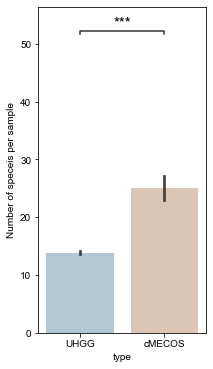

In [52]:
plt.figure(figsize=[3,6])
zz=sns.barplot(data=box_data,x="type",y="size",orient="v",palette=["#adc7d9","#e1c4af"],order=["UHGG","cMECOS"])
add_stat_annotation(zz,data=box_data,x="type",y="size",box_pairs=[ ("UHGG","cMECOS")],test="Mann-Whitney",text_format='star', loc='inside',fontsize=15)
plt.ylabel("Number of speceis per sample")
plt.savefig("additional_sp_vsHUGG_barplot.pdf")

In [15]:
# count the average of species number per sample in UHGG and cMECOS
box_data.groupby("type").mean()

,size
type,
UHGG,13.894487
cMECOS,25.083333
